
# K-Nearest Neighbors (KNN) Classification  
## Decision Boundary Visualization using Iris Dataset

### Objective
In this assignment, you will:
- Load and explore a real dataset (Iris)
- Implement KNN using scikit-learn
- Observe predictions for different values of **k**
- Visualize decision boundaries
- Analyze the effect of distance metrics

**Important Instructions**
- Do NOT use GridSearchCV or RandomizedSearchCV
- Change values of `k` manually
- Use only two features and two classes



## Task 1: Load and Explore the Dataset
We will use the Iris dataset from `sklearn`.  
Only:
- Features: Sepal Length, Sepal Width  
- Classes: Setosa (0) and Versicolor (1)


In [59]:

from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

iris = load_iris()

X = iris.data[:100, :2]  
y = iris.target[:100]


X.shape,y.shape

df = pd.DataFrame(X, columns=["Sepal Length", "Sepal Width"])
df["Class"] = y
df.head()


,Sepal Length,Sepal Width,Class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0



## Task 2: Visualize the Dataset


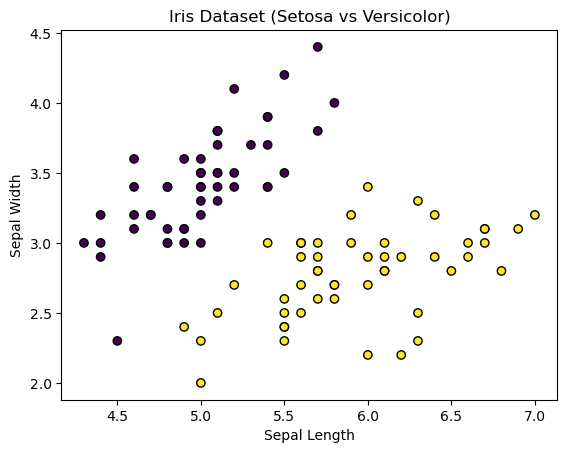

In [3]:

import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Dataset (Setosa vs Versicolor)")
plt.show()


## Task 3: Train a Basic KNN Model (k = 3)


1) split the data into Train data and Test data
2) Fit a KNeighborsClassifier
3) Make the prediction
4) Check for the accuracy

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [7]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [61]:
y_pred=knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1])

In [9]:
knn.score(X_test,y_test)

1.0

In [60]:
from sklearn.metrics import accuracy_score

In [62]:
accuracy_score(y_test,y_pred)

1.0


## Task 4: Predictions for Different Values of k


In [68]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [65]:
knn.score(X_train,y_train)

1.0

In [66]:
knn.score(X_test,y_test)

1.0

In [67]:
knn=KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [39]:
knn.score(X_train,y_train)

1.0

In [40]:
knn.score(X_test,y_test)

1.0

In [41]:
knn=KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [42]:
knn.score(X_train,y_train)

1.0

In [43]:
knn.score(X_test,y_test)

1.0


## Task 5: Decision Boundary Function (Provided)


In [44]:

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.02),
        np.arange(y_min, y_max, 0.02)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.xlabel("Sepal Length")
    plt.ylabel("Sepal Width")
    plt.title(title)
    plt.show()



## Task 6: Decision Boundary for Different Values of k


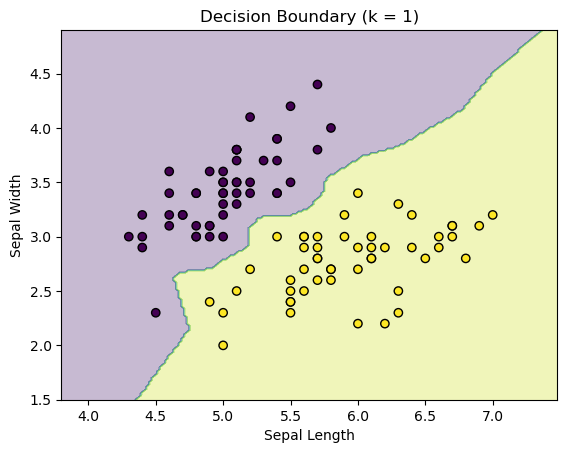

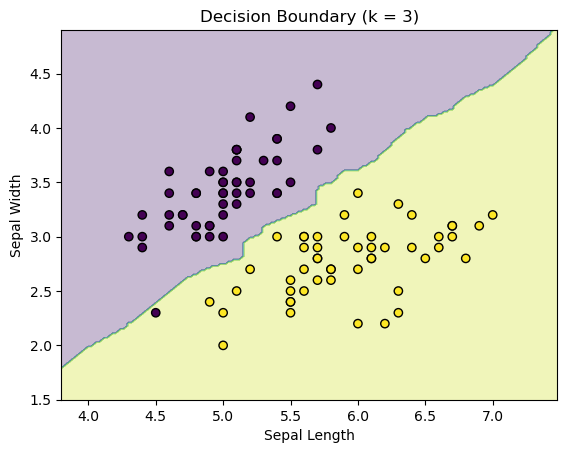

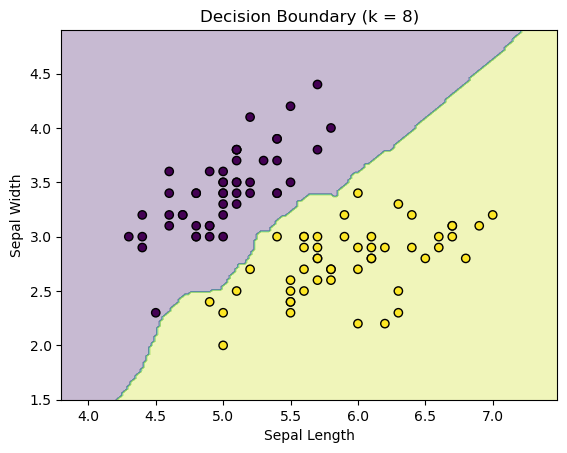

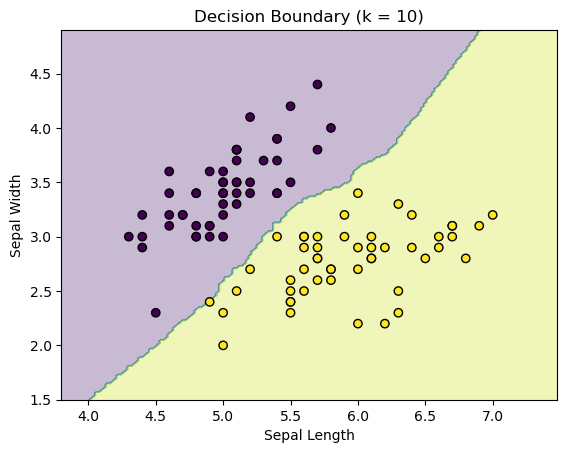

In [45]:

for k in [1, 3, 8, 10]:
    model = KNeighborsClassifier(n_neighbors=k, p=2)
    model.fit(X, y)
    plot_decision_boundary(model, X, y, title=f"Decision Boundary (k = {k})")



## Task 7: Effect of Distance Metric
Fix k = 5 and compare Euclidean vs Manhattan distance


In [1]:
#Plot a decision boundary when using k=5 and change the distance

## EUCLIDEAN DISTANCE

In [46]:
knn_euclidean=KNeighborsClassifier(n_neighbors=5,p=2)
knn_euclidean.fit(X_train,y_train)

KNeighborsClassifier()

In [47]:
knn_euclidean.score(X_test,y_test)

1.0

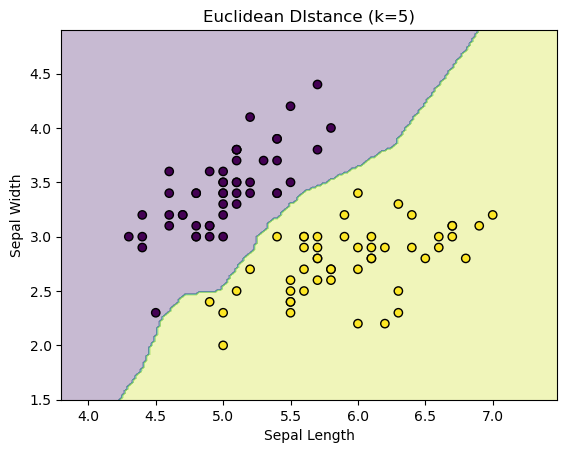

In [51]:
plot_decision_boundary(knn_euclidean,X,y,'Euclidean DIstance (k=5)')

## MANHATTAN DISTANCE

In [53]:
knn_manhattan=KNeighborsClassifier(n_neighbors=5,p=1)
knn_manhattan.fit(X_train,y_train)

KNeighborsClassifier(p=1)

In [54]:
knn_manhattan.score(X_test,y_test)

1.0

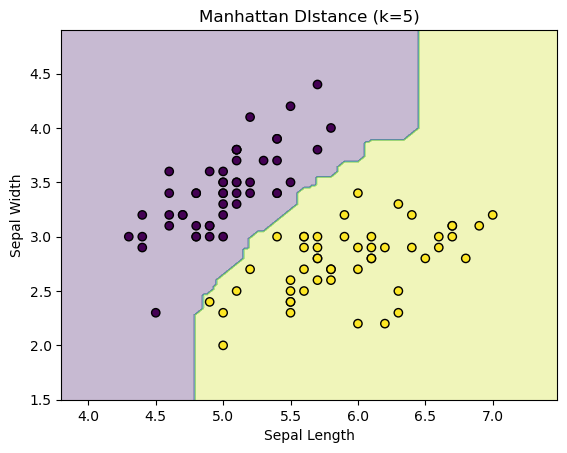

In [55]:
plot_decision_boundary(knn_manhattan,X,y,'Manhattan DIstance (k=5)')


## Task 8: Observations (Answer in Markdown)


#### 1.How do predictions change as k increases?

- when the values of k increses the predictions becomes smoother.The small k values captures the local patterns and the large k values consider more neighbors and it generalize the predictions 

#### 2.Which k value gives the most complex decision boundary?

- k=1 gives the most complex  decision boundard because when we perform the trial and error on nearest neighbor so trying different k values and pick  one with best validation performance
- trail and eroor gives best k accuracy between bias and variance

#### 3.Why does k = 1 behave differently?

- At k = 1, the model memorizes the training data. It is extremely sensitive to noise and outliers, causing overfitting and poor generalization.


#### 4.How does distance metric affect results?

- Euclidean distance considers straight-line distance and works well when features are on similar scales.
- Manhattan distance measures grid-like distance and can produce slightly different boundaries, especially when data distribution is rectangular or axis-aligned.


#### 5.Which configuration would you choose and why?

- I would choose k = 5 with Euclidean distance because in the plot we can see a  a good balance between bias and variance, produces smooth decision boundaries, and achieves stable test accuracy.